# Electricity Price Prediction 

<img src=https://assets.bwbx.io/images/users/iqjWHBFdfxIU/iP63yCAEMYms/v0/-1x-1.jpg width=500>

In this project, we will be training a machine learning model to predict the price of electricity consumed by machines.

### Column Meanings
DateTime: Date and time of the record

Holiday: contains the name of the holiday if the day is a national holiday

HolidayFlag: contains 1 if it’s a bank holiday otherwise 0

DayOfWeek: contains values between 0-6 where 0 is Monday

WeekOfYear: week of the year

Day: Day of the date

Month: Month of the date

Year: Year of the date

PeriodOfDay: half-hour period of the day

ForcastWindProduction: forecasted wind production

SystemLoadEA forecasted national load

SMPEA: forecasted price

ORKTemperature: actual temperature measured

ORKWindspeed: actual windspeed measured

CO2Intensity: actual C02 intensity for the electricity produced

ActualWindProduction: actual wind energy production

SystemLoadEP2: actual national system load

SMPEP2: the actual price of the electricity consumed (labels or values to be predicted)

### Import Libraries

In [1]:
import pandas as pd 
pd.set_option("display.max_columns",100)
pd.set_option('display.max_rows',100)

import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

### Read Data

In [2]:
df=pd.read_csv('electricity.txt')

### Exploratory Data Analysis

In [3]:
df.head()

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,01/11/2011 00:00,NaN,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.00,9.30,600.71,356.00,3159.60,54.32
1,01/11/2011 00:30,NaN,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.00,11.10,605.42,317.00,2973.01,54.23
2,01/11/2011 01:00,NaN,0,1,44,1,11,2011,2,328.57,3060.71,49.10,5.00,11.10,589.97,311.00,2834.00,54.23
3,01/11/2011 01:30,NaN,0,1,44,1,11,2011,3,335.60,2945.56,48.04,6.00,9.30,585.94,313.00,2725.99,53.47
4,01/11/2011 02:00,NaN,0,1,44,1,11,2011,4,342.90,2849.34,33.75,6.00,11.10,571.52,346.00,2655.64,39.87


In [4]:
df.shape

(38014, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   DateTime                38014 non-null  object
 1   Holiday                 1536 non-null   object
 2   HolidayFlag             38014 non-null  int64 
 3   DayOfWeek               38014 non-null  int64 
 4   WeekOfYear              38014 non-null  int64 
 5   Day                     38014 non-null  int64 
 6   Month                   38014 non-null  int64 
 7   Year                    38014 non-null  int64 
 8   PeriodOfDay             38014 non-null  int64 
 9   ForecastWindProduction  38014 non-null  object
 10  SystemLoadEA            38014 non-null  object
 11  SMPEA                   38014 non-null  object
 12  ORKTemperature          38014 non-null  object
 13  ORKWindspeed            38014 non-null  object
 14  CO2Intensity            38014 non-null  object
 15  Ac

In [6]:
df.isnull().sum()

DateTime                      0
Holiday                   36478
HolidayFlag                   0
DayOfWeek                     0
WeekOfYear                    0
Day                           0
Month                         0
Year                          0
PeriodOfDay                   0
ForecastWindProduction        0
SystemLoadEA                  0
SMPEA                         0
ORKTemperature                0
ORKWindspeed                  0
CO2Intensity                  0
ActualWindProduction          0
SystemLoadEP2                 0
SMPEP2                        0
dtype: int64

In [7]:
df.describe()

,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay
count,38014.000000,38014.000000,38014.000000,38014.000000,38014.000000,38014.000000,38014.000000
mean,0.040406,2.997317,28.124586,15.739412,6.904246,2012.383859,23.501105
std,0.196912,1.999959,15.587575,8.804247,3.573696,0.624956,13.853108
min,0.000000,0.000000,1.000000,1.000000,1.000000,2011.000000,0.000000
25%,0.000000,1.000000,15.000000,8.000000,4.000000,2012.000000,12.000000
50%,0.000000,3.000000,29.000000,16.000000,7.000000,2012.000000,24.000000
75%,0.000000,5.000000,43.000000,23.000000,10.000000,2013.000000,35.750000
max,1.000000,6.000000,52.000000,31.000000,12.000000,2013.000000,47.000000


In [8]:
df.corr(numeric_only=True)

,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay
HolidayFlag,1.000000,-0.124773,-0.003286,0.046133,0.032414,-0.023431,-0.000016
DayOfWeek,-0.124773,1.000000,0.007504,-0.004423,0.003056,-0.001196,0.000120
WeekOfYear,-0.003286,0.007504,1.000000,0.060816,0.971182,-0.237323,-0.000083
Day,0.046133,-0.004423,0.060816,1.000000,0.008698,-0.001786,0.000084
Month,0.032414,0.003056,0.971182,0.008698,1.000000,-0.236833,-0.000087
Year,-0.023431,-0.001196,-0.237323,-0.001786,-0.236833,1.000000,-0.000049
PeriodOfDay,-0.000016,0.000120,-0.000083,0.000084,-0.000087,-0.000049,1.000000


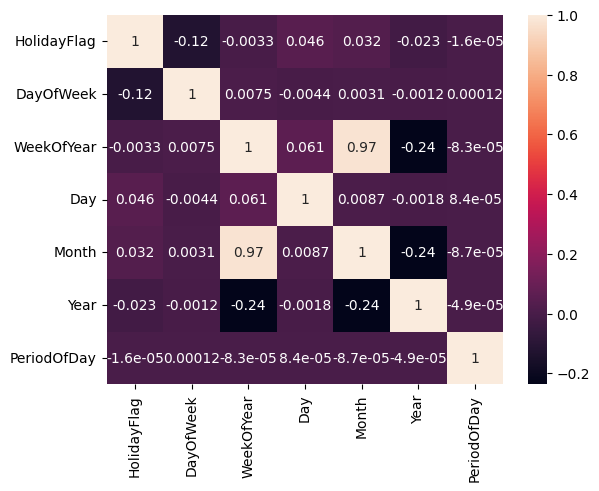

In [9]:
sns.heatmap(df.corr(numeric_only=True), annot=True);

In [10]:
df['Holiday'].unique()

array([nan, 'Christmas Eve', 'Christmas', "St Stephen's Day",
       "New Year's Eve", "New Year's Day", "St Patrick's Day",
       'Good Friday', 'Holy Saturday', 'Easter', 'Easter Monday',
       'May Day', 'June Bank Holiday', 'August Bank Holiday',
       'October Bank Holiday'], dtype=object)

In [11]:
df['Holiday'].fillna('None',inplace=True)

In [12]:
df['ForecastWindProduction']=pd.to_numeric(df['ForecastWindProduction'],errors='coerce')
df['SystemLoadEA']=pd.to_numeric(df['SystemLoadEA'],errors='coerce')  
df['SMPEA']=pd.to_numeric(df['SMPEA'],errors='coerce') 
df['ORKTemperature']=pd.to_numeric(df['ORKTemperature'],errors='coerce')
df['ORKWindspeed']=pd.to_numeric(df['ORKWindspeed'],errors='coerce')
df['CO2Intensity']=pd.to_numeric(df['CO2Intensity'],errors='coerce')
df['ActualWindProduction']=pd.to_numeric(df['ActualWindProduction'],errors='coerce')
df['SystemLoadEP2']=pd.to_numeric(df['SystemLoadEP2'],errors='coerce')
df['SMPEP2']=pd.to_numeric(df['SMPEP2'],errors='coerce')

In [13]:
df['ORKWindspeed'].unique()

array([ 9.3, 11.1,  7.4,  5.6,  3.7,  nan, 13. , 22.2, 18.5, 20.4, 24.1,
       25.9, 27.8, 31.5, 29.6, 33.3, 35.2, 37. , 38.9, 42.6, 44.4, 51.9,
       48.2, 46.3, 50. , 53.7, 55.6, 40.7, 14.8,  1.9,  0. , 16.7, 57.4,
       21.6, 25.2, 28.8, 43.2, 39.6, 59.3, 61.1,  3.6, 14.4, 18. , 10.8,
       64.8, 63. , 70.4, 72.2, 68.5,  7.2, 74.1, 75.9, 66.7])

In [14]:
df['ForecastWindProduction'].fillna(0,inplace=True)
df['SystemLoadEA'].fillna(0,inplace=True)  
df['SMPEA'].fillna(0,inplace=True) 
df['ORKTemperature'].fillna(0,inplace=True)
df['ORKWindspeed'].fillna(0,inplace=True)
df['CO2Intensity'].fillna(0,inplace=True)
df['ActualWindProduction'].fillna(0,inplace=True)
df['SystemLoadEP2'].fillna(0,inplace=True)
df['SMPEP2'].fillna(0,inplace=True)

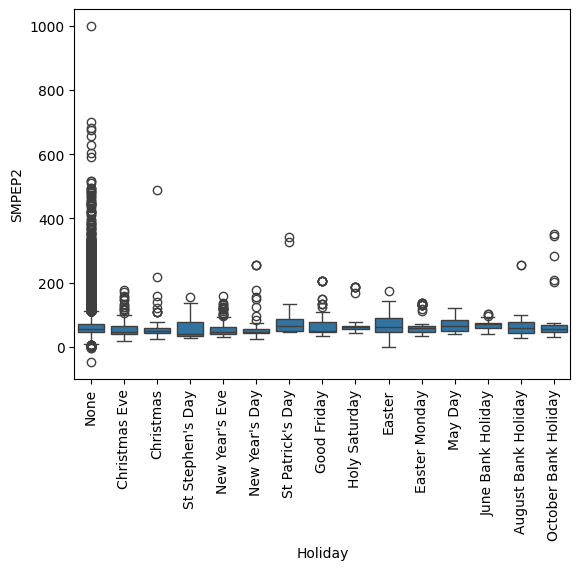

In [15]:
sns.boxplot(x='Holiday',y='SMPEP2',data=df)
plt.xticks(rotation=90);

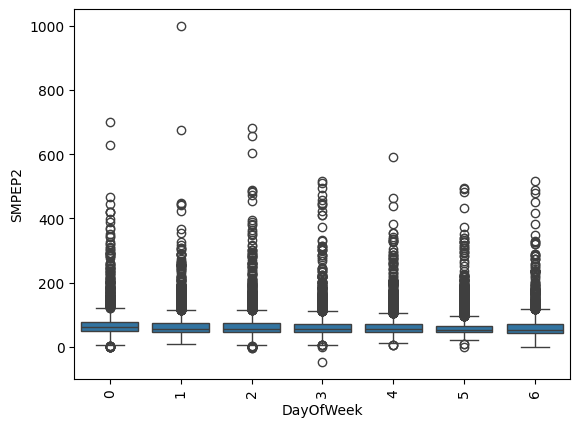

In [16]:
sns.boxplot(x='DayOfWeek',y='SMPEP2',data=df)
plt.xticks(rotation=90);

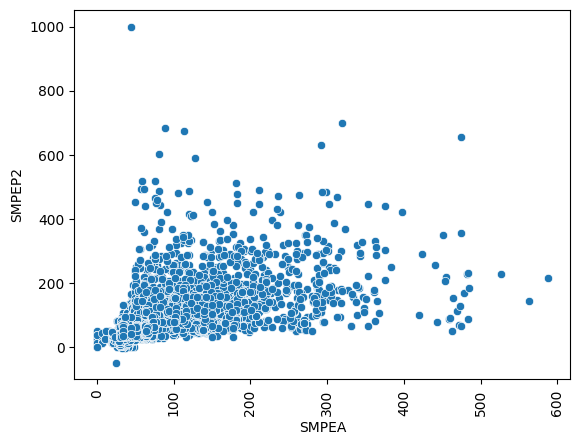

In [17]:
sns.scatterplot(x='SMPEA',y='SMPEP2',data=df)
plt.xticks(rotation=90);

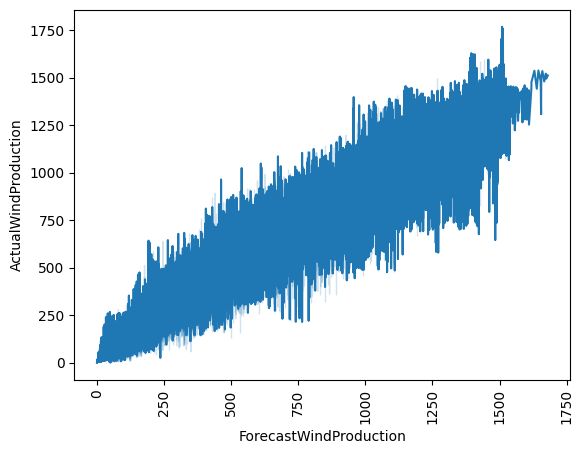

In [18]:
sns.lineplot(x='ForecastWindProduction',y='ActualWindProduction',data=df)
plt.xticks(rotation=90);

In [19]:
df.isnull().sum()

DateTime                  0
Holiday                   0
HolidayFlag               0
DayOfWeek                 0
WeekOfYear                0
Day                       0
Month                     0
Year                      0
PeriodOfDay               0
ForecastWindProduction    0
SystemLoadEA              0
SMPEA                     0
ORKTemperature            0
ORKWindspeed              0
CO2Intensity              0
ActualWindProduction      0
SystemLoadEP2             0
SMPEP2                    0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DateTime                38014 non-null  object 
 1   Holiday                 38014 non-null  object 
 2   HolidayFlag             38014 non-null  int64  
 3   DayOfWeek               38014 non-null  int64  
 4   WeekOfYear              38014 non-null  int64  
 5   Day                     38014 non-null  int64  
 6   Month                   38014 non-null  int64  
 7   Year                    38014 non-null  int64  
 8   PeriodOfDay             38014 non-null  int64  
 9   ForecastWindProduction  38014 non-null  float64
 10  SystemLoadEA            38014 non-null  float64
 11  SMPEA                   38014 non-null  float64
 12  ORKTemperature          38014 non-null  float64
 13  ORKWindspeed            38014 non-null  float64
 14  CO2Intensity            38014 non-null

### Feature Engineering & Modeling - Regression

In [21]:
abs(df.corr(numeric_only=True)['SMPEP2'].sort_values(ascending=False))

SMPEP2                    1.000000
SMPEA                     0.617221
SystemLoadEP2             0.516934
SystemLoadEA              0.490923
PeriodOfDay               0.323105
Year                      0.046017
HolidayFlag               0.006038
ORKTemperature            0.006164
Day                       0.013792
Month                     0.015445
WeekOfYear                0.016348
ORKWindspeed              0.032180
CO2Intensity              0.033035
DayOfWeek                 0.069878
ForecastWindProduction    0.079981
ActualWindProduction      0.083162
Name: SMPEP2, dtype: float64

In [22]:
df.columns

Index(['DateTime', 'Holiday', 'HolidayFlag', 'DayOfWeek', 'WeekOfYear', 'Day',
       'Month', 'Year', 'PeriodOfDay', 'ForecastWindProduction',
       'SystemLoadEA', 'SMPEA', 'ORKTemperature', 'ORKWindspeed',
       'CO2Intensity', 'ActualWindProduction', 'SystemLoadEP2', 'SMPEP2'],
      dtype='object')

In [23]:
x=df[['PeriodOfDay', 'ForecastWindProduction',
       'SystemLoadEA', 'SMPEA', 'ORKTemperature', 'ORKWindspeed',
       'CO2Intensity', 'ActualWindProduction', 'SystemLoadEP2','DayOfWeek']]
y=df[['SMPEP2']]

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
rf=RandomForestRegressor()
gb=GradientBoostingRegressor()
kn=KNeighborsRegressor()

In [25]:
x_train, x_test,y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [26]:
rf.fit(x, y)

RandomForestRegressor()

In [27]:
rfpredict=rf.predict(x_test)

In [28]:
mean_squared_error(y_test,rfpredict)**.5

8.08647345264576

In [29]:
r2_score(y_test,rfpredict)

0.945438149845074

In [30]:
gb.fit(x, y)

GradientBoostingRegressor()

In [31]:
gbpredict=gb.predict(x_test)

In [32]:
mean_squared_error(y_test,gbpredict)**.5

22.168156054270888

In [33]:
r2_score(y_test,gbpredict)

0.5899565316539935

In [34]:
kn.fit(x, y)

KNeighborsRegressor()

In [35]:
knpredict=kn.predict(x_test)

In [36]:
mean_squared_error(y_test,knpredict)**.5

21.35290415389298

In [37]:
r2_score(y_test,knpredict)

0.6195613257375702

The RandomForestRegressor model, which yielded the best result among the models, has demonstrated a strong fit to the data and explained approximately 94.5% of the variance.

In [38]:
feature_importance = pd.DataFrame({'Feature': x.columns, 'Importance': rf.feature_importances_})

In [39]:
feature_importance=feature_importance.sort_values(by='Importance',ascending=False)
feature_importance

,Feature,Importance
3,SMPEA,0.410171
8,SystemLoadEP2,0.188032
6,CO2Intensity,0.069049
2,SystemLoadEA,0.059424
1,ForecastWindProduction,0.057472
7,ActualWindProduction,0.053777
0,PeriodOfDay,0.050873
4,ORKTemperature,0.049936
9,DayOfWeek,0.031853
5,ORKWindspeed,0.029414


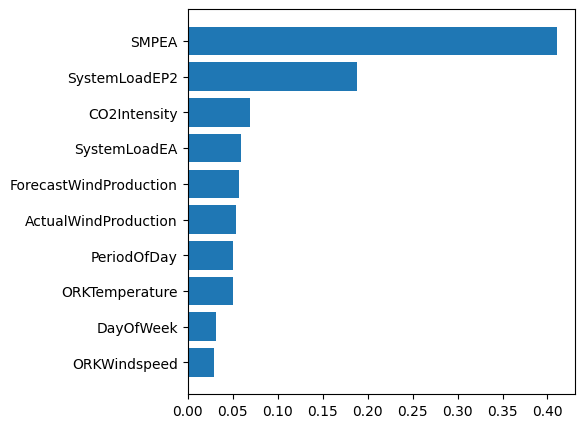

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.barh(feature_importance['Feature'],feature_importance['Importance'])
plt.gca().invert_yaxis()

### <font color='dark'> Predict the Prices of Electricity </font>

In [41]:
# 'PeriodOfDay', 'ForecastWindProduction','SystemLoadEA', 'SMPEA', 'ORKTemperature', 'ORKWindspeed','CO2Intensity', 'ActualWindProduction', 'SystemLoadEP2','DayOfWeek'
features=[[4,323.4,2338,50.2,5.00,9.30,400.71,356.00,159.60,1]]
rf.predict(features)

array([55.9943])